# Question

Which of the factors (Broad Phase of Flight, Purpose of Flight, Weather Condition) have the largest importance in the classification of severity of accidents?


Additional
- Checking location factor and performing classification to check the accuracy.

# Basic Libraries

In [0]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # We only need pyplot
sb.set() # set the default Seaborn style for graphics

# Basic Processing of Aviation dataset

In [46]:
# Dataset is now stored in a Pandas Dataframe
Avdata = pd.read_csv('AviationData.csv',engine='python')
Avdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84262 non-null  object 
 1   Investigation.Type      84257 non-null  object 
 2   Accident.Number         84262 non-null  object 
 3   Event.Date              84262 non-null  object 
 4   Location                84185 non-null  object 
 5   Country                 83755 non-null  object 
 6   Latitude                30163 non-null  float64
 7   Longitude               30154 non-null  float64
 8   Airport.Code            47723 non-null  object 
 9   Airport.Name            50439 non-null  object 
 10  Injury.Severity         84262 non-null  object 
 11  Aircraft.Damage         81553 non-null  object 
 12  Aircraft.Category       27508 non-null  object 
 13  Registration.Number     80412 non-null  object 
 14  Make                    84192 non-null

In [47]:
#Remove NaN values
Avdata= Avdata.replace(np.nan,0)
Avdata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,Non-Fatal,Substantial,Airplane,N7095M,Cessna,175,No,1.0,Reciprocating,Part 91: General Aviation,0,Personal,0,0.0,0.0,0.0,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,Fatal(2),Destroyed,Airplane,N602TF,Mooney,M20S,No,1.0,Reciprocating,Part 91: General Aviation,0,Personal,0,2.0,0.0,0.0,0.0,VMC,TAKEOFF,Preliminary,08/01/2020
2,20200102X54844,Accident,ANC20CA011,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,0,0,Non-Fatal,Substantial,Airplane,N4667C,Cessna,170,No,1.0,0,Part 91: General Aviation,0,Personal,0,0.0,0.0,0.0,2.0,0,0,Preliminary,02/01/2020
3,20191230X91852,Accident,CEN20CA048,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,0,0,Non-Fatal,Substantial,Airplane,N519RV,Vans,RV 10,Yes,0.0,0,Part 91: General Aviation,0,Personal,0,0.0,0.0,0.0,1.0,0,0,Preliminary,31/12/2019
4,20191228X62945,0,WPR20CA053,2019-12-28,"Missoula, MT",United States,0.000000,0.000000,MSO,0,Unavailable,Substantial,0,N4476B,Cessna,170,No,1.0,0,Public Aircraft,0,0,0,0.0,0.0,0.0,0.0,0,0,Preliminary,03/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,0.000000,0.000000,0,0,Fatal(1),Destroyed,0,N15NY,Cessna,501,No,0.0,0,0,0,Personal,0,1.0,2.0,0.0,0.0,VMC,APPROACH,Probable Cause,16/04/1980
84258,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,0.000000,0.000000,0,0,Fatal(2),Destroyed,0,N1168J,Rockwell,112,No,1.0,Reciprocating,0,0,Personal,0,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/09/2000
84259,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,0,0,Fatal(3),Destroyed,0,N5142R,Cessna,172M,No,1.0,Reciprocating,0,0,Personal,0,3.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,26/02/2007
84260,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,0.000000,0.000000,0,0,Fatal(4),Destroyed,0,N5069P,PIPER,PA24-180,No,1.0,Reciprocating,0,0,Personal,0,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19/09/1996


In [48]:
Avdata = Avdata.drop(['Event.Id','Accident.Number','Airport.Code','Airport.Name','Registration.Number',
                   'FAR.Description','Air.Carrier','Publication.Date'],axis=1)
Avdata

,Investigation.Type,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Schedule,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status
0,Accident,2019-12-31,"Elk, CA",United States,39.128611,-123.715833,Non-Fatal,Substantial,Airplane,Cessna,175,No,1.0,Reciprocating,0,Personal,0.0,0.0,0.0,1.0,VMC,TAKEOFF,Factual
1,Accident,2019-12-31,"OLATHE, KS",United States,38.846111,-94.736111,Fatal(2),Destroyed,Airplane,Mooney,M20S,No,1.0,Reciprocating,0,Personal,2.0,0.0,0.0,0.0,VMC,TAKEOFF,Preliminary
2,Accident,2019-12-31,"Fairbanks, AK",United States,64.666945,-148.133334,Non-Fatal,Substantial,Airplane,Cessna,170,No,1.0,0,0,Personal,0.0,0.0,0.0,2.0,0,0,Preliminary
3,Accident,2019-12-30,"GRANBURY, TX",United States,32.365556,-97.645000,Non-Fatal,Substantial,Airplane,Vans,RV 10,Yes,0.0,0,0,Personal,0.0,0.0,0.0,1.0,0,0,Preliminary
4,0,2019-12-28,"Missoula, MT",United States,0.000000,0.000000,Unavailable,Substantial,0,Cessna,170,No,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84257,Accident,1979-08-02,"Canton, OH",United States,0.000000,0.000000,Fatal(1),Destroyed,0,Cessna,501,No,0.0,0,0,Personal,1.0,2.0,0.0,0.0,VMC,APPROACH,Probable Cause
84258,Accident,1977-06-19,"EUREKA, CA",United States,0.000000,0.000000,Fatal(2),Destroyed,0,Rockwell,112,No,1.0,Reciprocating,0,Personal,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause
84259,Accident,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,0,Cessna,172M,No,1.0,Reciprocating,0,Personal,3.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause
84260,Accident,1962-07-19,"BRIDGEPORT, CA",United States,0.000000,0.000000,Fatal(4),Destroyed,0,PIPER,PA24-180,No,1.0,Reciprocating,0,Personal,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause


## Categorical Dataframe

In [0]:
CatData = pd.DataFrame(Avdata[['Investigation.Type','Aircraft.Damage','Aircraft.Category','Amateur.Built','Engine.Type','Schedule','Purpose.of.Flight','Weather.Condition','Broad.Phase.of.Flight','Report.Status']])

In [50]:
for x in CatData:
    CatData[x] = CatData[x].astype('category')
CatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Investigation.Type     84262 non-null  category
 1   Aircraft.Damage        84262 non-null  category
 2   Aircraft.Category      84262 non-null  category
 3   Amateur.Built          84262 non-null  category
 4   Engine.Type            84262 non-null  category
 5   Schedule               84262 non-null  category
 6   Purpose.of.Flight      84262 non-null  category
 7   Weather.Condition      84262 non-null  category
 8   Broad.Phase.of.Flight  84262 non-null  category
 9   Report.Status          84262 non-null  category
dtypes: category(10)
memory usage: 826.9 KB


# Exploratory Analysis on Categorical data

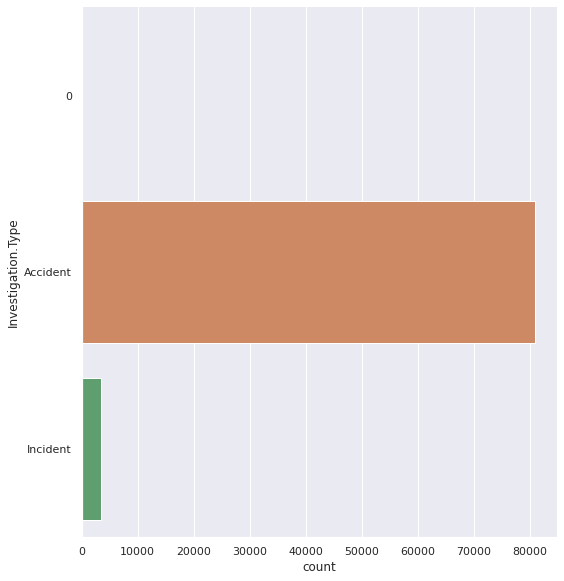

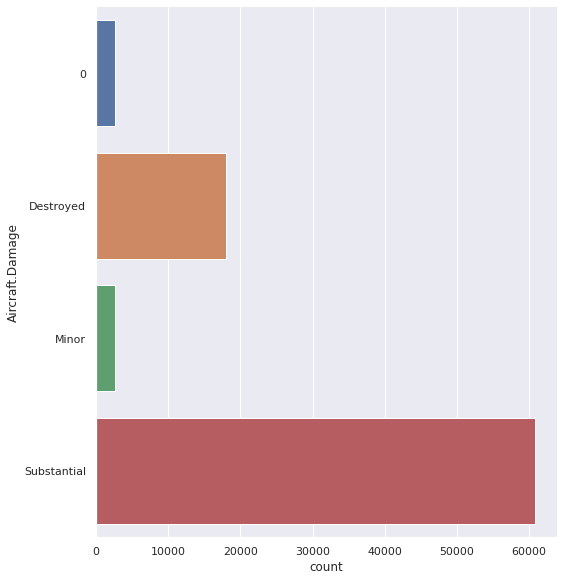

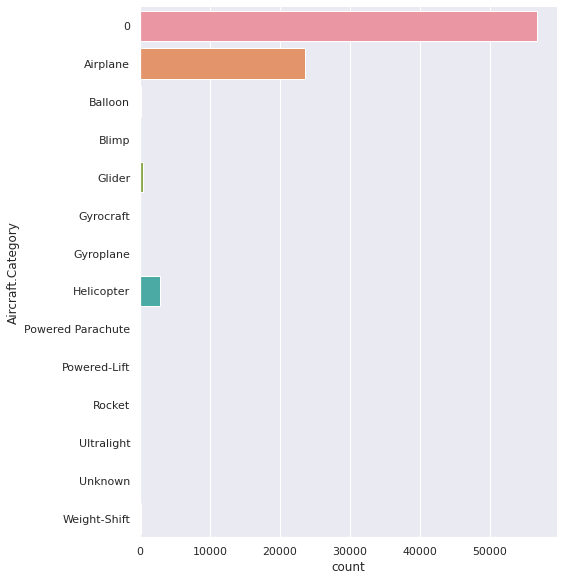

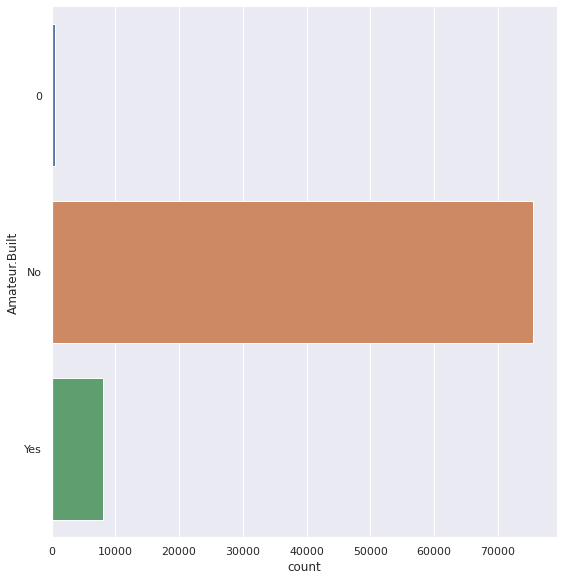

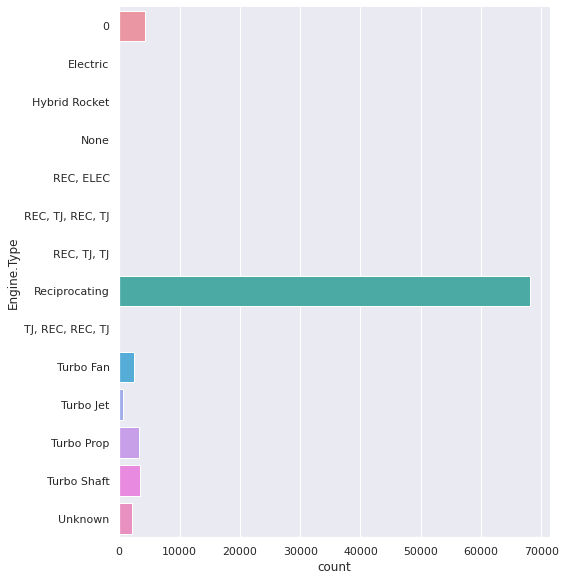

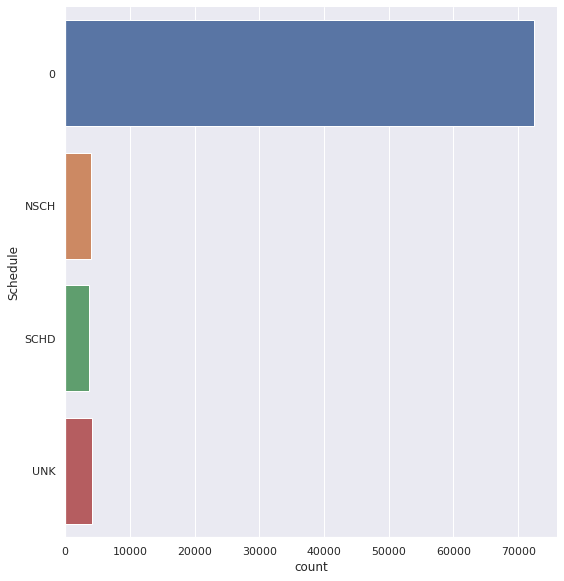

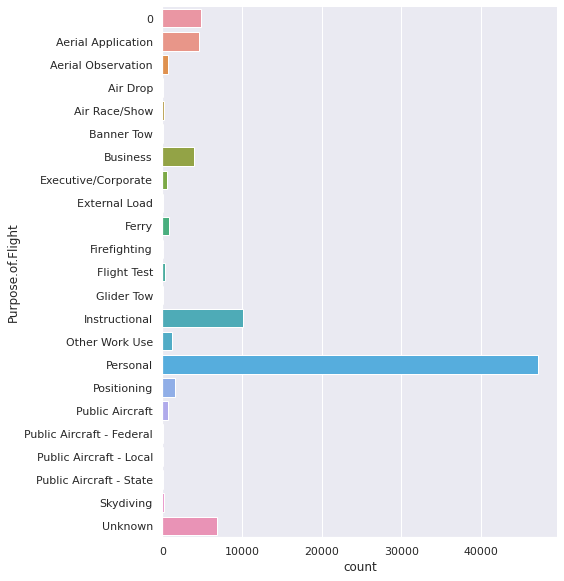

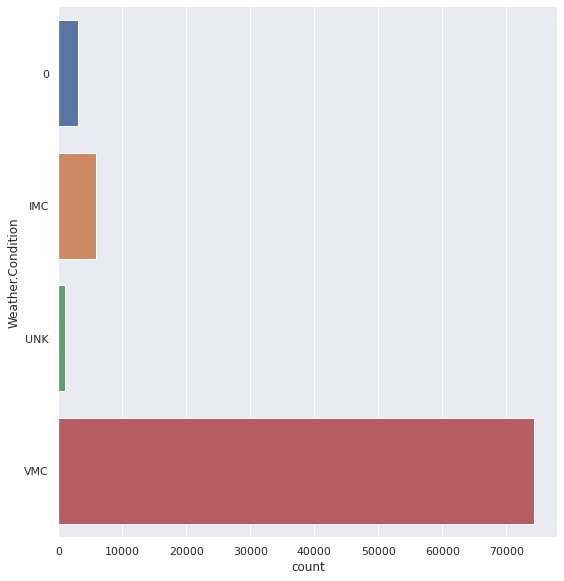

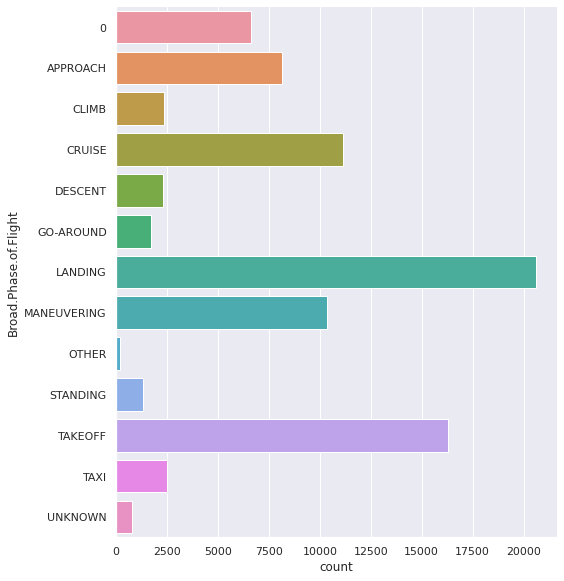

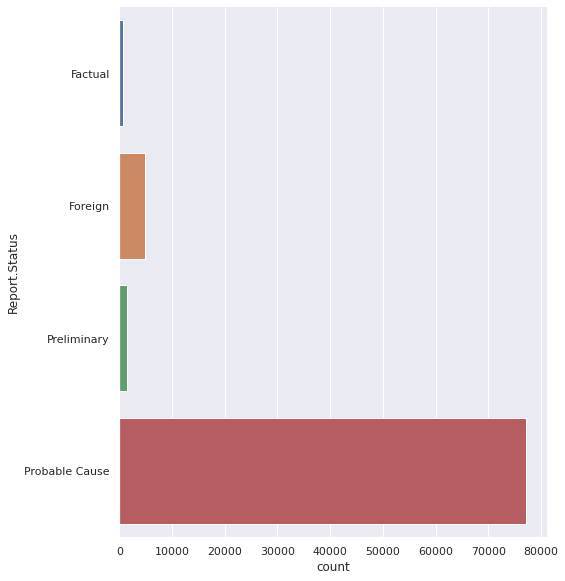

In [51]:
for x in CatData:
    sb.catplot(y = x, data = CatData, kind = "count", height = 8)

# Numerical Dataframe

In [0]:
NumData = pd.DataFrame(Avdata[['Latitude','Longitude', 'Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']])


In [53]:
NumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                84262 non-null  float64
 1   Longitude               84262 non-null  float64
 2   Number.of.Engines       84262 non-null  float64
 3   Total.Fatal.Injuries    84262 non-null  float64
 4   Total.Serious.Injuries  84262 non-null  float64
 5   Total.Minor.Injuries    84262 non-null  float64
 6   Total.Uninjured         84262 non-null  float64
dtypes: float64(7)
memory usage: 4.5 MB


In [54]:
NumData.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,84262.000000,84262.000000,84262.000000,84262.000000,84262.000000,84262.000000,84262.000000
mean,13.439831,-33.462894,1.078410,0.573972,0.214094,0.342218,4.879578
std,19.461457,50.659345,0.511634,5.193191,1.116459,2.264392,26.948739
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-83.411597,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,34.014444,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,89.218056,179.618611,8.000000,349.000000,111.000000,380.000000,699.000000


# Exploratory Analysis on Numerical dataframe

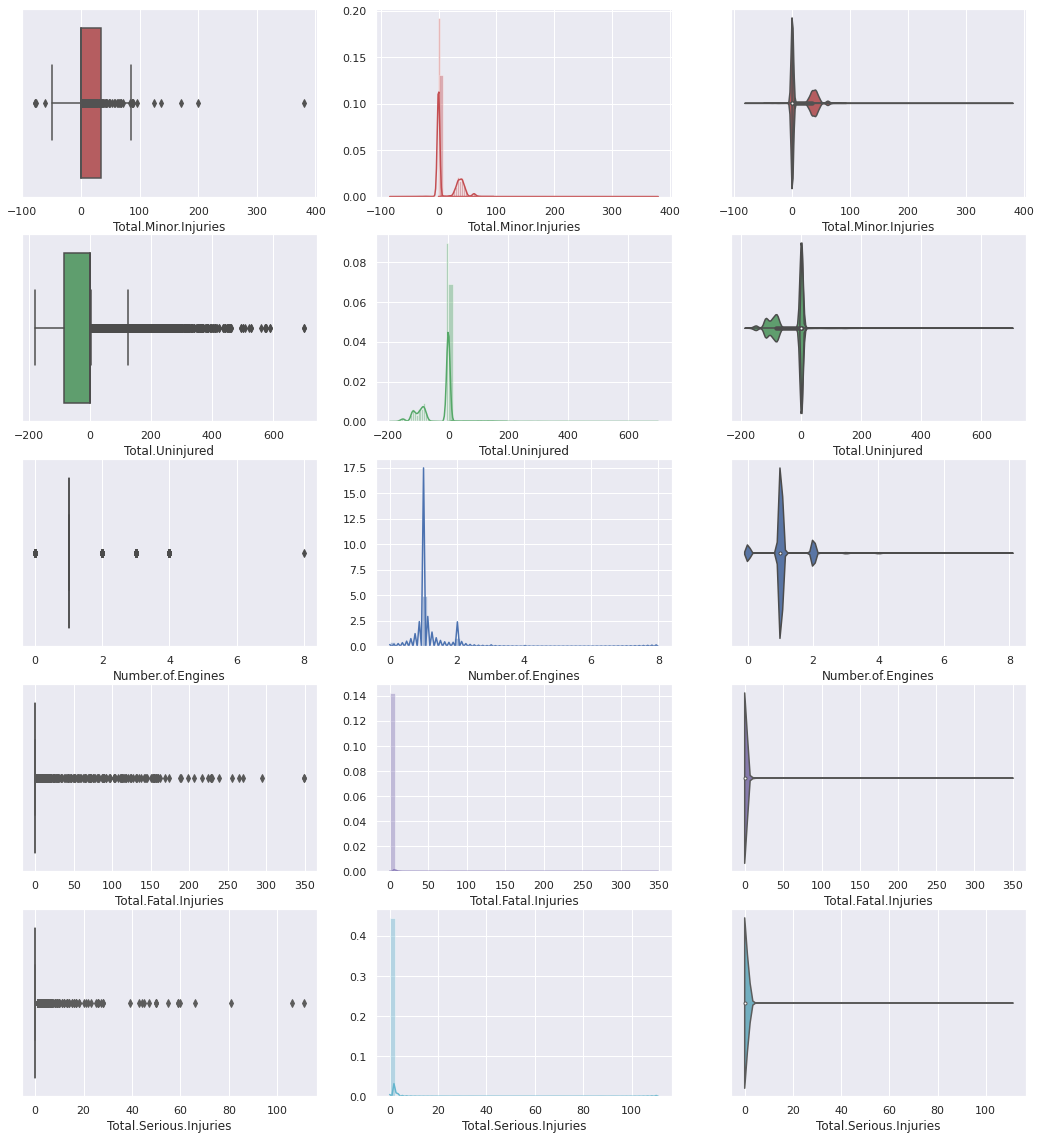

In [55]:
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in NumData:
    #if(var == 'Latitude' or var == 'Longitude'):
        #continue
    sb.boxplot(NumData[var], orient = "h", color = colors[count%5], ax = axes[count%5,0])
    sb.distplot(NumData[var], color = colors[count%5], ax = axes[count%5,1])
    sb.violinplot(NumData[var], color = colors[count%5], ax = axes[count%5,2])
    count += 1

Pairplot

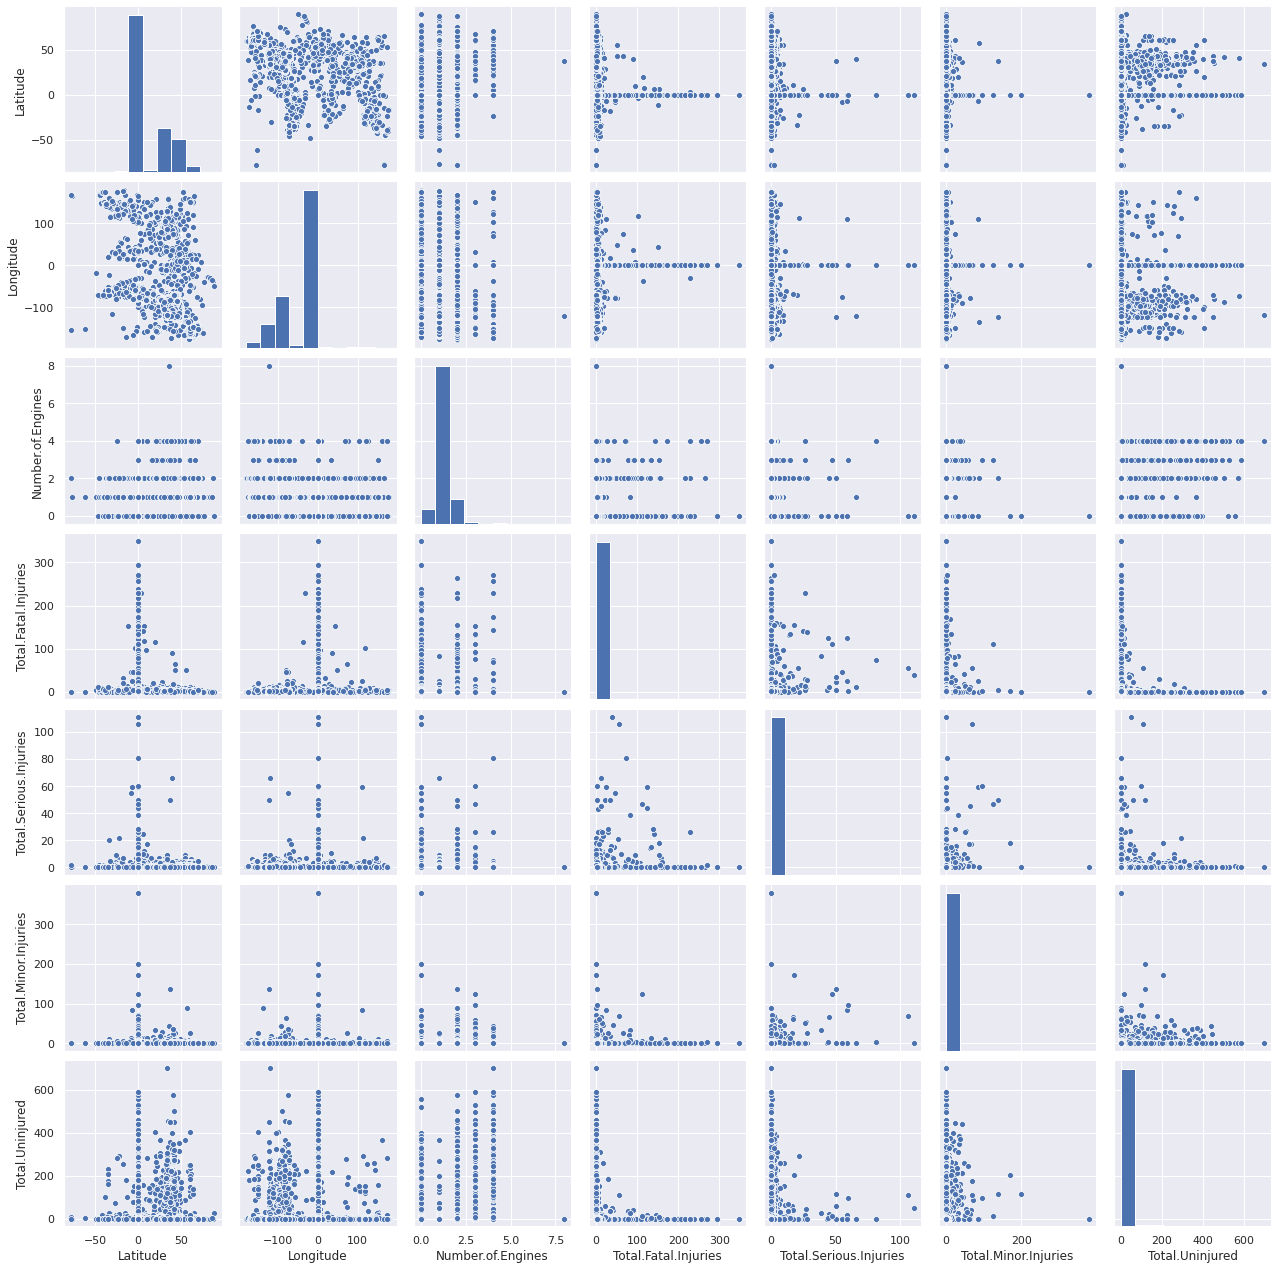

In [56]:
sb.pairplot(data = NumData)

Heat Map

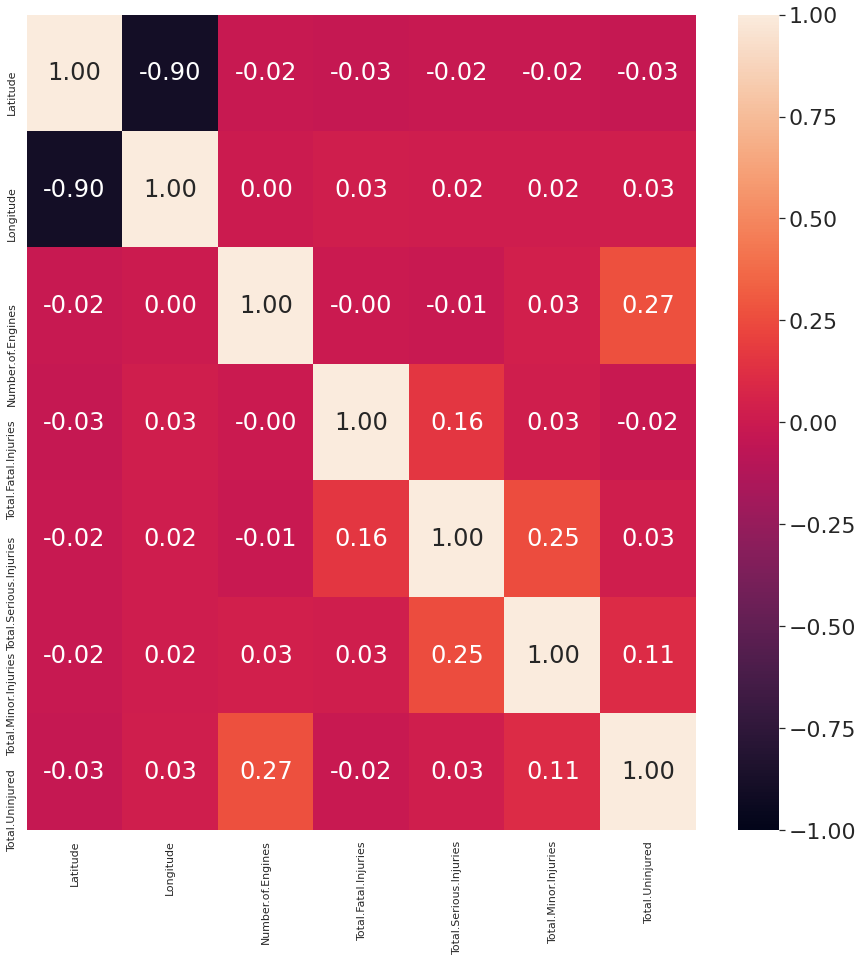

In [57]:
f, axes = plt.subplots(1, 1, figsize=(15, 15))
sb.set(font_scale=2)

sb.heatmap(NumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
sb.set(font_scale=2)

Time Series of fatal injuries over the years

In [0]:
import operator # For dictionary sorting by value  

In [0]:
Avdata["Event.Date"] = Avdata["Event.Date"].fillna('UNKNOWN');
Avdata["Event.Date"] = Avdata["Event.Date"].str.lower();

sorted_data = Avdata.sort_values(['Total.Fatal.Injuries'], ascending = False);

In [0]:
def get_year(event_date):
    
    if(len(event_date.strip()) == 0):
        return -1;
    
    dob_stripped = event_date.split('-');
    
    if(len(dob_stripped) != 3):
        return -2;
    
    return int(dob_stripped[0]);

In [0]:
rowc = 0
fatal_yearly = {}

for index, row in sorted_data.iterrows():
    year = get_year(row['Event.Date'])
    fatal = row['Total.Fatal.Injuries']
    
    if(year in fatal_yearly):
        fatal_yearly[year] = fatal_yearly[year] +  fatal
    else:
        fatal_yearly[year] = fatal
    
    rowc = rowc + 1

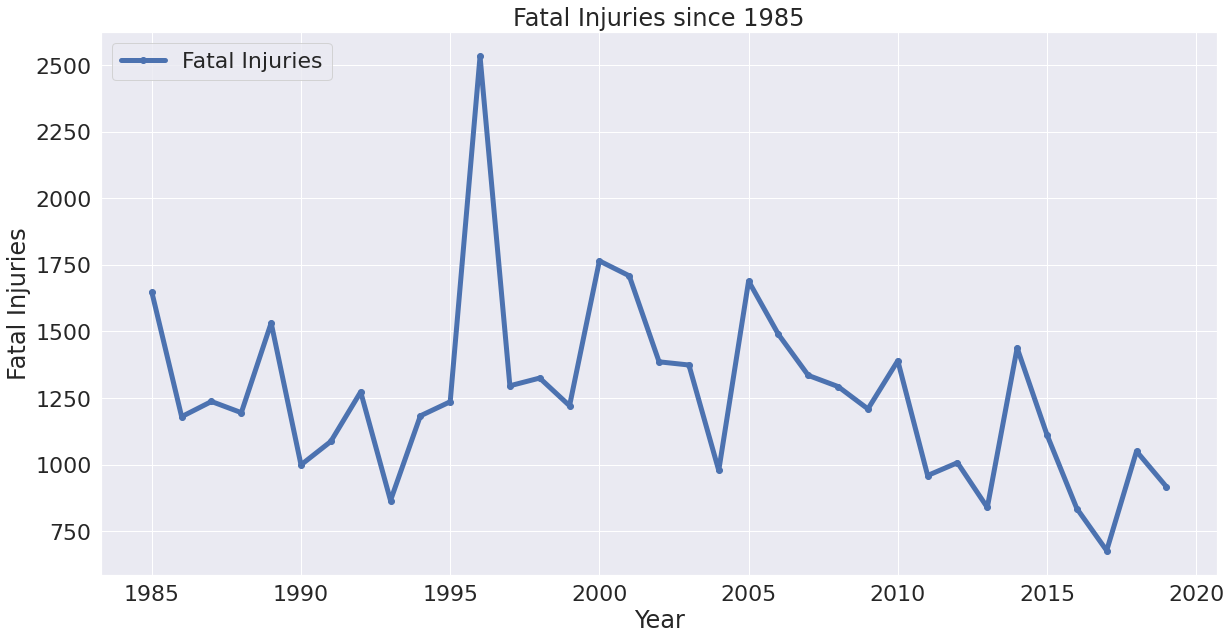

In [62]:
x_values = [];
y_values = [];
    
fatal_yearly_sorted = sorted(fatal_yearly.items(), key = operator.itemgetter(0));    
    
for k, v in fatal_yearly_sorted:
    # ignore before 1985 as they don't have anything significant
    if(k < 1985):
        continue;
    x_values.append(k);
    y_values.append(v);    
    
f, axes = plt.subplots(1, 1, figsize=(20,10))
plt.plot(x_values, y_values, label = 'Fatal Injuries', lw = 5, marker = 'o');

ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

plt.xlabel('Year');
plt.ylabel('Fatal Injuries');
plt.legend(loc = 'upper left');
plt.title('Fatal Injuries since 1985')
    
plt.show()

# Classification of Severity of Accidents with various factors (Purpose of Flight, Weather Condition, Broad Phase of Flight)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

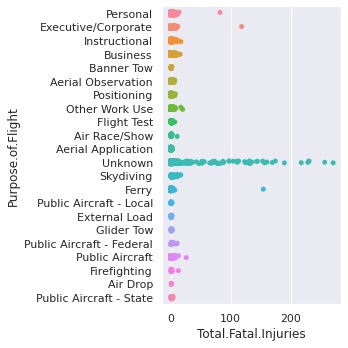

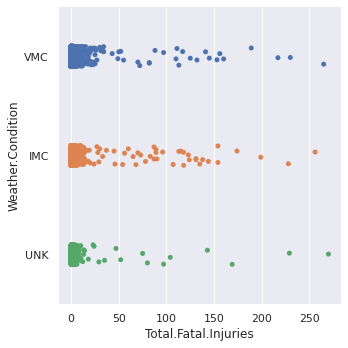

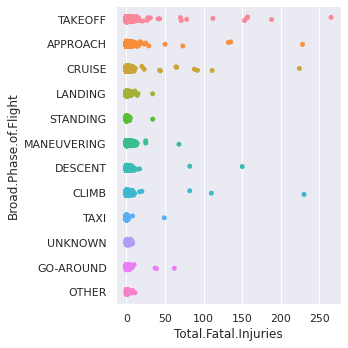

In [64]:
# Classification of 3 different variable
Avdata = pd.read_csv('AviationData.csv',engine='python')

FinalData = pd.DataFrame(Avdata[['Purpose.of.Flight','Weather.Condition','Broad.Phase.of.Flight']])
purpose=pd.DataFrame(Avdata['Purpose.of.Flight']) # purpose of flight dataframe
wctype=pd.DataFrame(Avdata['Weather.Condition']) # weather condition dataframe
phase=pd.DataFrame(Avdata['Broad.Phase.of.Flight']) # phase of flight dataframe
fatal = pd.DataFrame(Avdata['Total.Fatal.Injuries'])
#Scatterplots
sb.set(font_scale=1)
for i in FinalData:
    sb.catplot(x = 'Total.Fatal.Injuries', y = i, data = Avdata, orient = "h")

# Classification of Severity of Accidents with Purpose of Flight factor


Decision Tree 

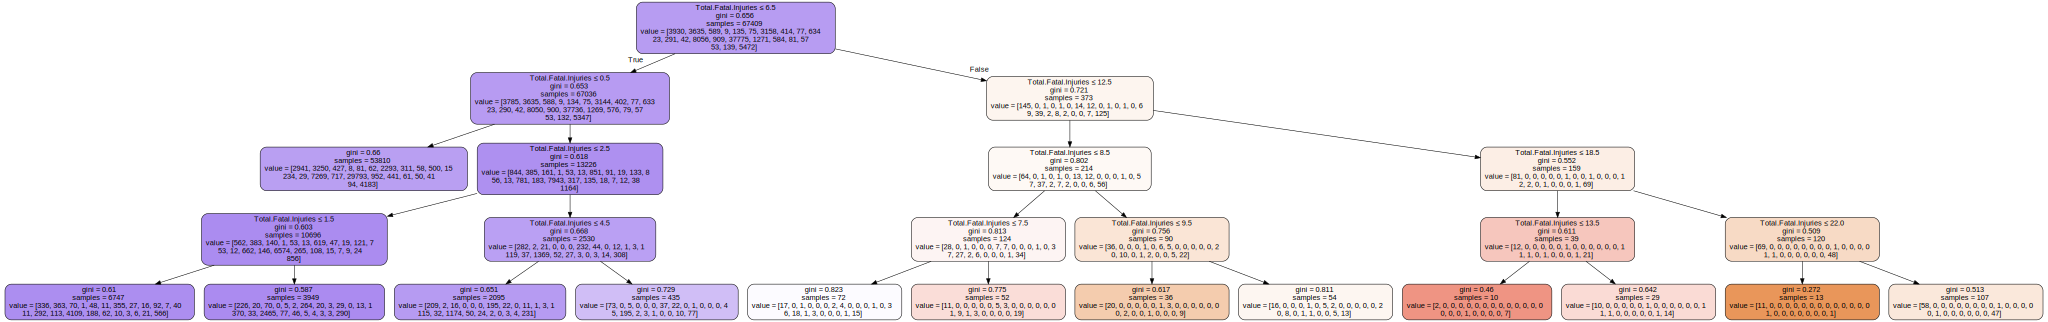

In [65]:
Xvar_train, Xvar_test, yvar_train, yvar_test = train_test_split(fatal, purpose, test_size = 0.20)

# Create a Decision Tree Classifier object
purposedectree = DecisionTreeClassifier(max_depth = 4)

#Remove NaN values
Xvar_train = Xvar_train.replace(np.nan, '0')
yvar_train = yvar_train.replace(np.nan, '0')

# Train the Decision Tree Classifier model
purposedectree.fit(Xvar_train,yvar_train)

# Export the Decision Tree as a dot object
purposetreedot = export_graphviz(purposedectree,                                      # the model
                          feature_names = Xvar_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(purposetreedot)

Confusion Matrix

Train Dataset

Classification Accuracy 	: 56.22246287587711


Test Dataset

Classification Accuracy 	: 56.18584228327301




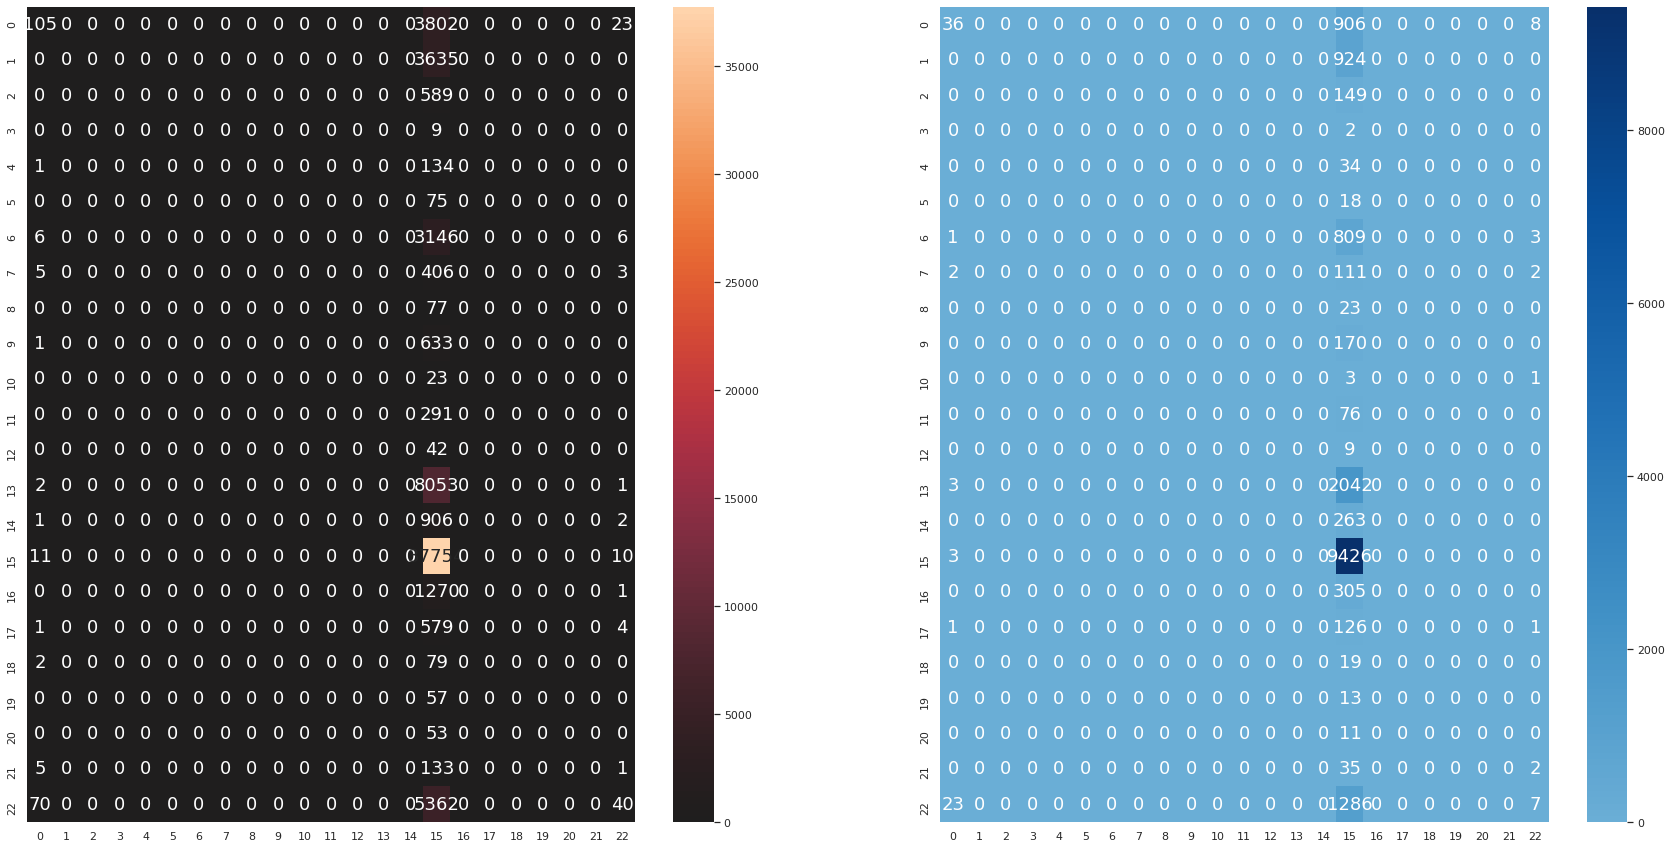

In [66]:
Xvar_test = Xvar_test.replace(np.nan, '0')
yvar_test = yvar_test.replace(np.nan, '0')

# Predict Legendary values corresponding to Total
yvar_train_pred = purposedectree.predict(Xvar_train)
yvar_test_pred = purposedectree.predict(Xvar_test)

# Check the Goodness of Fit (on Train Data)
print("Train Dataset")
print()
print("Classification Accuracy \t:", purposedectree.score(Xvar_train, yvar_train)*100)
print()
print()

# Check the Goodness of Fit (on Test Data)
print("Test Dataset")
print()
print("Classification Accuracy \t:", purposedectree.score(Xvar_test, yvar_test)*100)
print()
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 15))

sb.heatmap(confusion_matrix(yvar_train, yvar_train_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yvar_test, yvar_test_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap=plt.cm.Blues, ax = axes[1])

#Classification of Severity of Accidents with Weather Condition factor


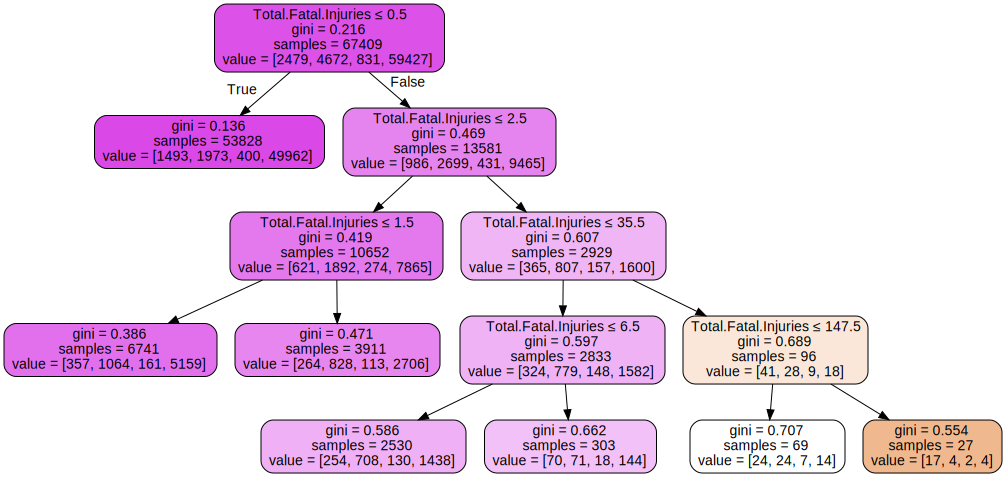

In [67]:
Xvar_train, Xvar_test, yvar_train, yvar_test = train_test_split(fatal, wctype, test_size = 0.20)

# Create a Decision Tree Classifier object
wcdectree = DecisionTreeClassifier(max_depth = 4)

#Remove NaN values
Xvar_train = Xvar_train.replace(np.nan, '0')
yvar_train = yvar_train.replace(np.nan, '0')

# Train the Decision Tree Classifier model
wcdectree.fit(Xvar_train,yvar_train)

# Export the Decision Tree as a dot object
wctreedot = export_graphviz(wcdectree,                                      # the model
                          feature_names = Xvar_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(wctreedot)

Train Dataset

Classification Accuracy 	: 88.19297126496461


Test Dataset

Classification Accuracy 	: 87.99026879487332




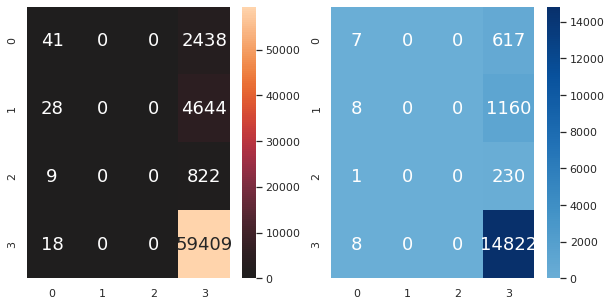

In [68]:
Xvar_test = Xvar_test.replace(np.nan, '0')
yvar_test = yvar_test.replace(np.nan, '0')

# Predict Legendary values corresponding to Total
yvar_train_pred = wcdectree.predict(Xvar_train)
yvar_test_pred = wcdectree.predict(Xvar_test)

# Check the Goodness of Fit (on Train Data)
print("Train Dataset")
print()
print("Classification Accuracy \t:", wcdectree.score(Xvar_train, yvar_train)*100)
print()
print()

# Check the Goodness of Fit (on Test Data)
print("Test Dataset")
print()
print("Classification Accuracy \t:", wcdectree.score(Xvar_test, yvar_test)*100)
print()
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(10, 5))

sb.heatmap(confusion_matrix(yvar_train, yvar_train_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yvar_test, yvar_test_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap=plt.cm.Blues, ax = axes[1])

# Classification of Severity of Accidents with Phase of Flight factor


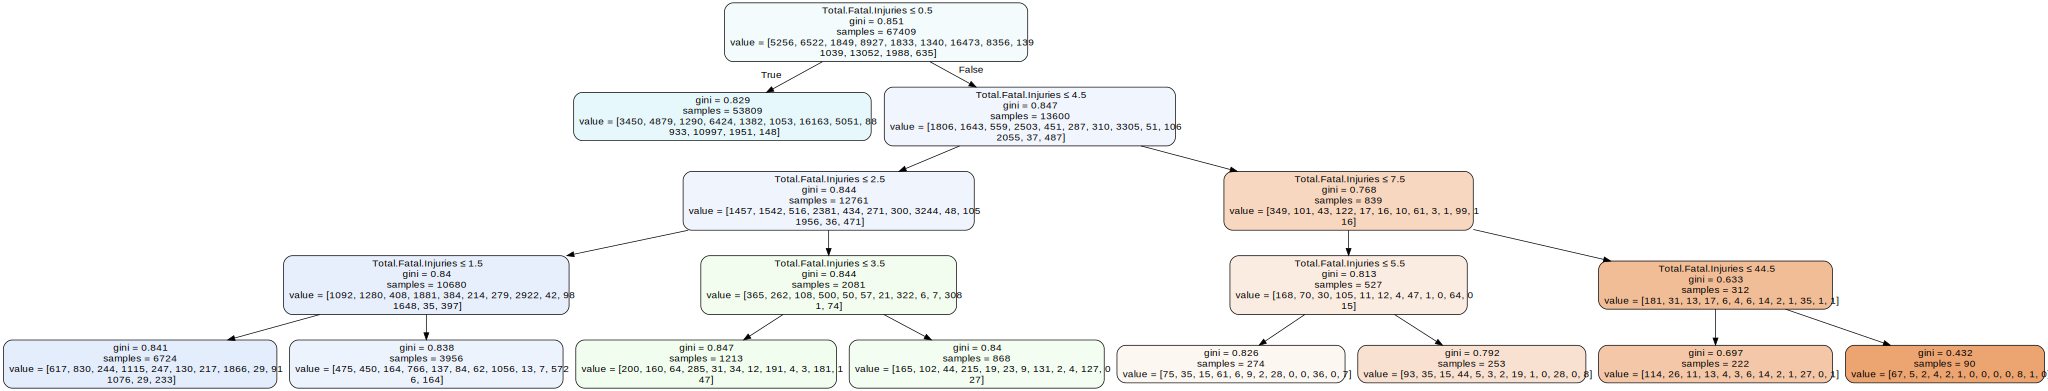

In [69]:
Xvar_train, Xvar_test, yvar_train, yvar_test = train_test_split(fatal, phase, test_size = 0.20)

# Create a Decision Tree Classifier object
phasedectree = DecisionTreeClassifier(max_depth = 4)

#Remove NaN values
Xvar_train = Xvar_train.replace(np.nan, '0')
yvar_train = yvar_train.replace(np.nan, '0')

# Train the Decision Tree Classifier model
phasedectree.fit(Xvar_train,yvar_train)

# Export the Decision Tree as a dot object
phasetreedot = export_graphviz(phasedectree,                                      # the model
                          feature_names = Xvar_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(phasetreedot)

Train Dataset

Classification Accuracy 	: 29.571718909937843


Test Dataset

Classification Accuracy 	: 29.49029846318163




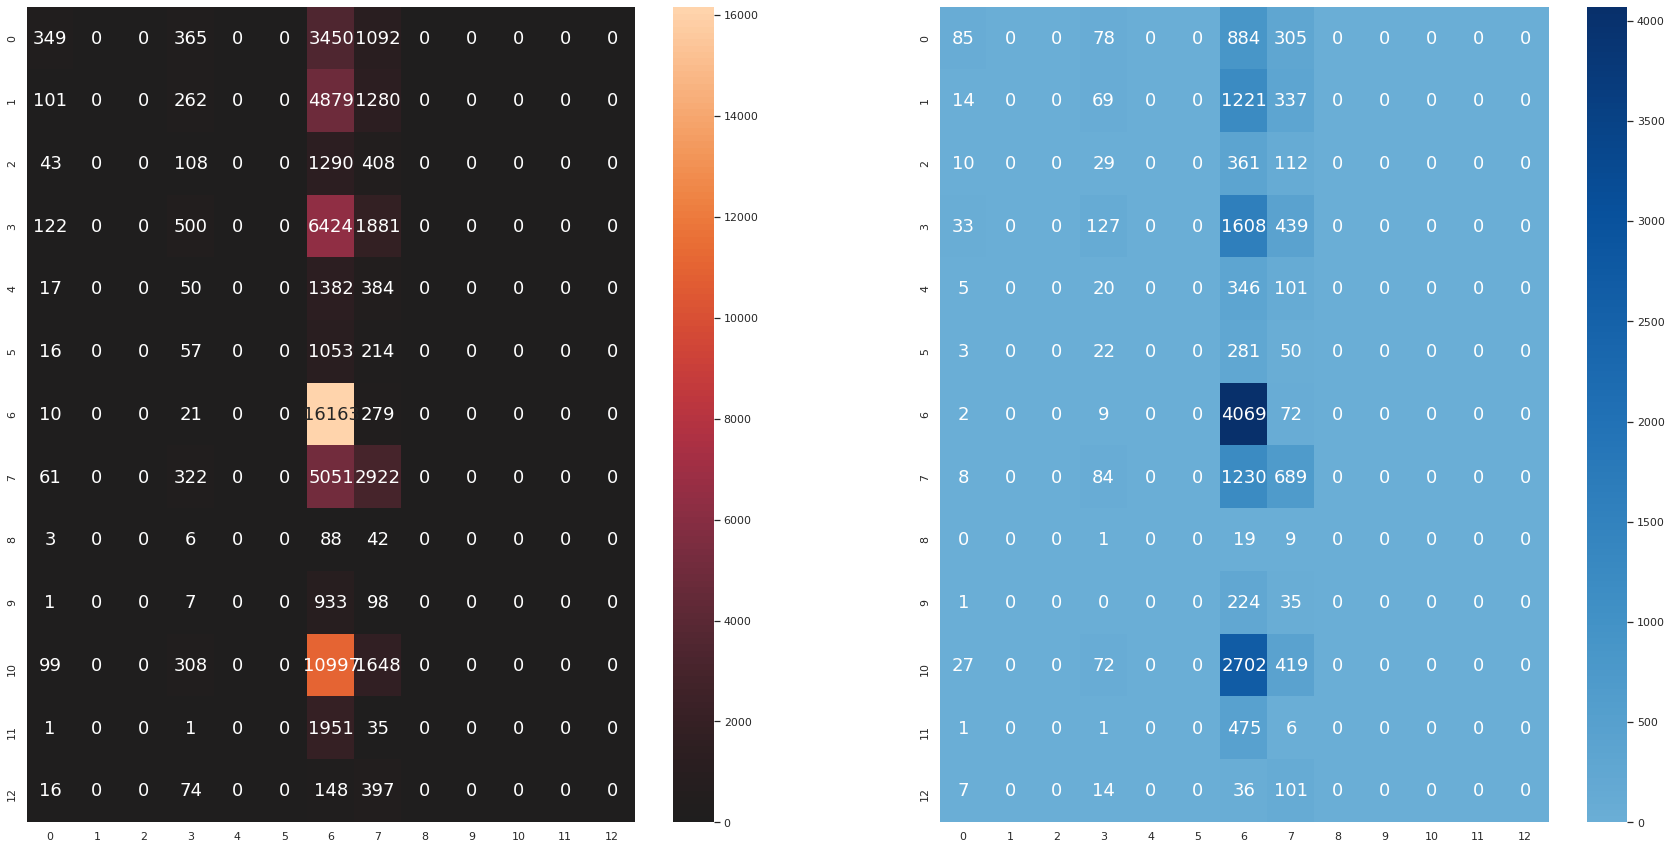

In [70]:
Xvar_test = Xvar_test.replace(np.nan, '0')
yvar_test = yvar_test.replace(np.nan, '0')

# Predict Legendary values corresponding to Total
yvar_train_pred = phasedectree.predict(Xvar_train)
yvar_test_pred = phasedectree.predict(Xvar_test)

# Check the Goodness of Fit (on Train Data)
print("Train Dataset")
print()
print("Classification Accuracy \t:", phasedectree.score(Xvar_train, yvar_train)*100)
print()
print()

# Check the Goodness of Fit (on Test Data)
print("Test Dataset")
print()
print("Classification Accuracy \t:", phasedectree.score(Xvar_test, yvar_test)*100)
print()
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 15))

sb.heatmap(confusion_matrix(yvar_train, yvar_train_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yvar_test, yvar_test_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap=plt.cm.Blues, ax = axes[1])

Based on our initial hypothesis , we believe that these 3 factors would have a strong postive relation with total fatal injuries. However, it turns out only Weather condition has a strong classification accuracy. This might be due to the number of variables present.


#Classification of Severity of Accidents with Location factor

Preparing Data - Splitting US vs Non-US data

In [0]:
Avdata_country = pd.DataFrame(Avdata[['Country', 'Total.Fatal.Injuries']])

#Replacing non-US data
Avdata_country.loc[Avdata_country['Country'] != 'United States', 'Country'] = 'Non-US'

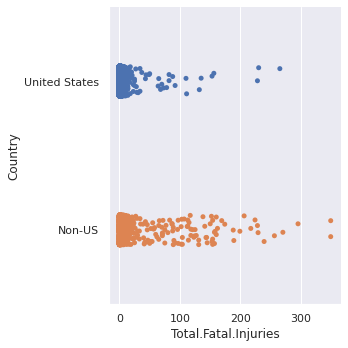

In [72]:
sb.catplot(x = 'Total.Fatal.Injuries', y = 'Country', data = Avdata_country, orient = "h")

In [0]:
Avdata_country.dropna(inplace=True)

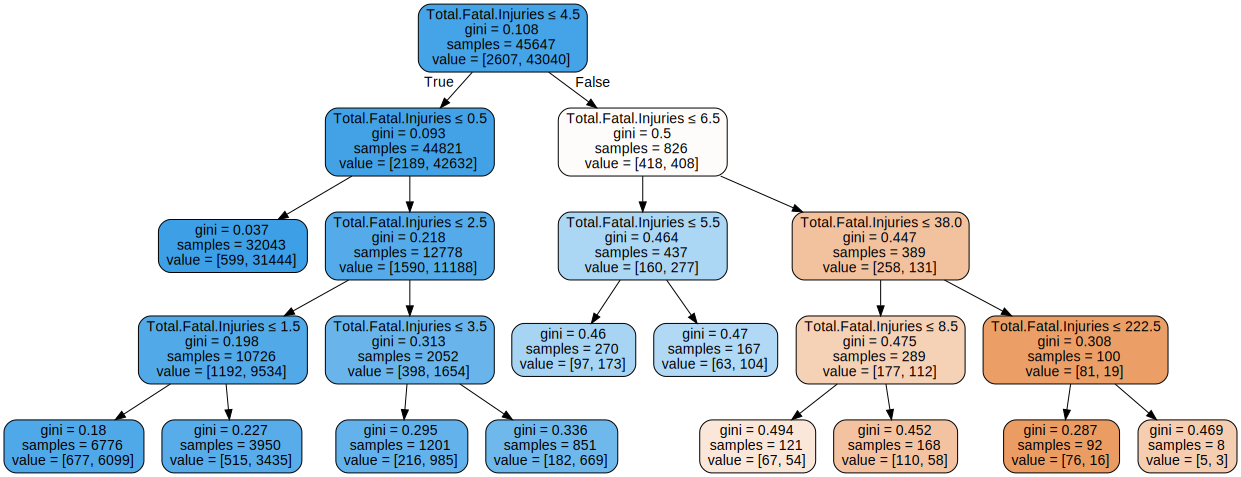

In [74]:
Xvar_train, Xvar_test, yvar_train, yvar_test = train_test_split(Avdata_country[['Total.Fatal.Injuries']], Avdata_country[['Country']], test_size = 0.20)

# Create a Decision Tree Classifier object
countrydectree = DecisionTreeClassifier(max_depth = 4)

#Remove NaN values
Xvar_train = Xvar_train.replace(np.nan, '0')
yvar_train = yvar_train.replace(np.nan, '0')

# Train the Decision Tree Classifier model
countrydectree.fit(Xvar_train,yvar_train)

# Export the Decision Tree as a dot object
purposetreedot = export_graphviz(countrydectree,                        # the model
                          feature_names = Xvar_train.columns,           # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
graphviz.Source(purposetreedot)

Train Dataset

Classification Accuracy 	: 94.56700330799396


Test Dataset

Classification Accuracy 	: 94.49702067998598




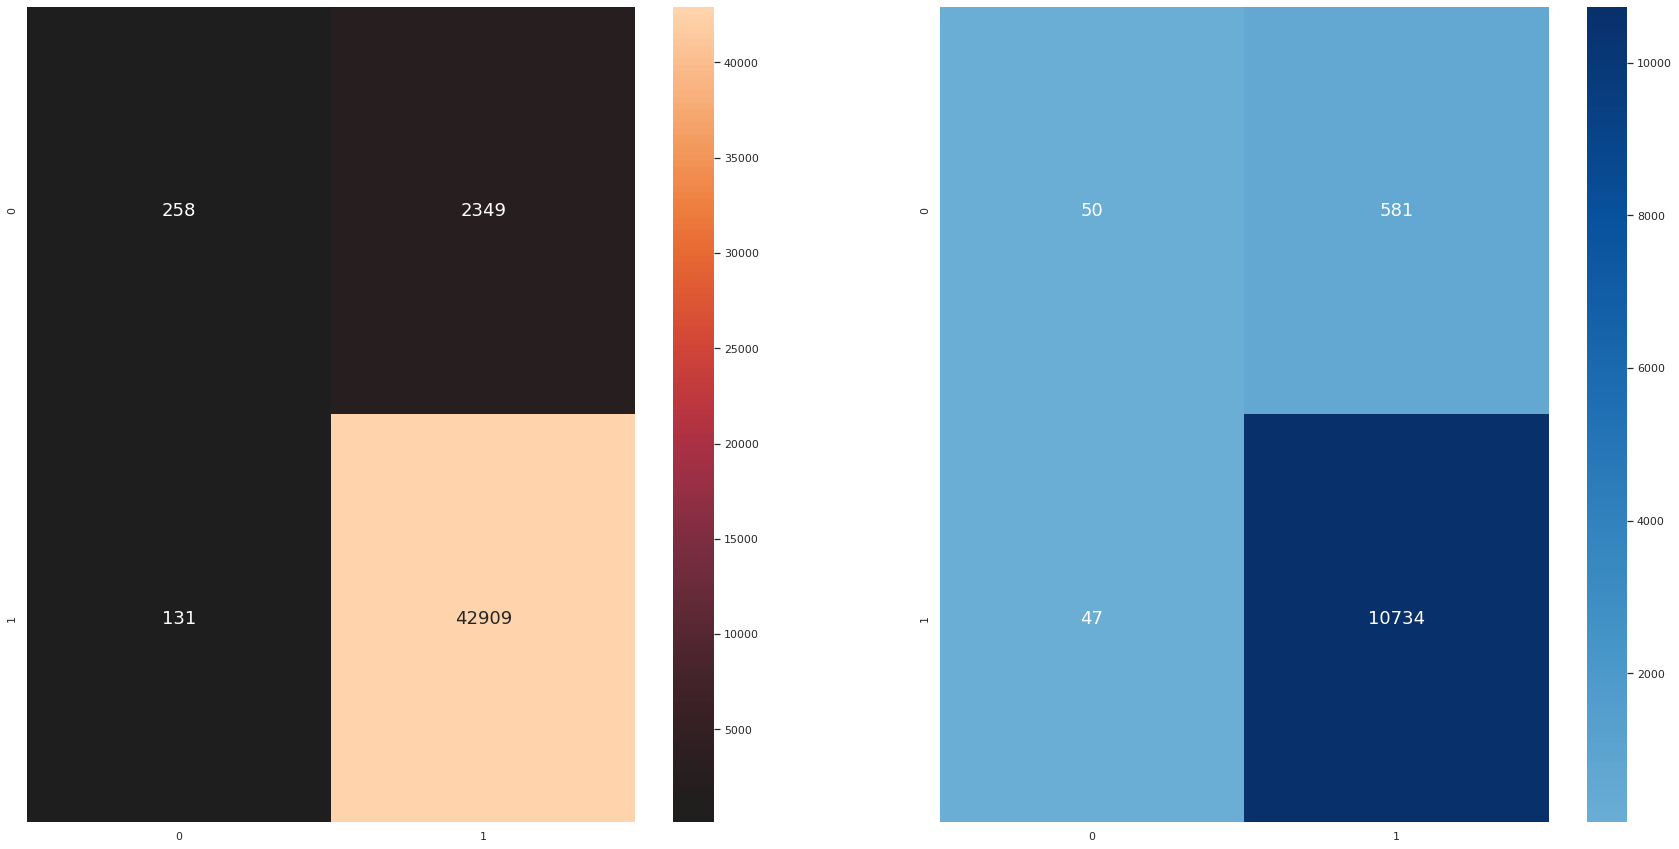

In [75]:
#Remove NaN values
Xvar_test = Xvar_test.replace(np.nan, '0')
yvar_test = yvar_test.replace(np.nan, '0')

# Predict Legendary values corresponding to Total
yvar_train_pred = countrydectree.predict(Xvar_train)
yvar_test_pred = countrydectree.predict(Xvar_test)

# Check the Goodness of Fit (on Train Data)
print("Train Dataset")
print()
print("Classification Accuracy \t:", countrydectree.score(Xvar_train, yvar_train)*100)
print()
print()

# Check the Goodness of Fit (on Test Data)
print("Test Dataset")
print()
print("Classification Accuracy \t:", countrydectree.score(Xvar_test, yvar_test)*100)
print()
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(30, 15))

sb.heatmap(confusion_matrix(yvar_train, yvar_train_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(yvar_test, yvar_test_pred), center=0.0,
           annot = True, fmt=".0f", annot_kws={"size": 18}, cmap=plt.cm.Blues, ax = axes[1])

# Country/Location

In [0]:
import plotly.express as px

In [77]:
# Data of Crashes visualise with ploty on google maps
Crash = pd.DataFrame(Avdata[['Investigation.Type','Event.Id','Location','Latitude','Longitude', 'Total.Fatal.Injuries']])

Crash["Total.Fatal.Injuries"] = Crash["Total.Fatal.Injuries"].fillna(0).astype(int);

# Get names of indexes for which total fatal injuries is 0
indexNames = Crash[ Crash['Total.Fatal.Injuries'] == 0 ].index
 
# Delete these row indexes from dataFrame
Crash.drop(indexNames , inplace=True)

fig = px.scatter_mapbox(Crash, lat="Latitude", lon="Longitude", hover_name="Location", hover_data=["Event.Id","Investigation.Type"],
                        color="Total.Fatal.Injuries", color_continuous_scale = 'Sunsetdark', zoom=1, height=600)

'''
Possible ways to change colour
color_discrete_map={"Europe": "red", "Asia": "green", "Americas": "blue"}
color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"]
color_continuous_scale = px.colors.qualitative.Light24
'''

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Colours of markers are coded according to the fatality/severity of the incidents.
Markers coloured light yellow and beige are those with few fatal injuries (below 50).
Markers coloured with more distinct colours are the anomalies, with significant amounts of fatal injuries. (For example, the orange marker has 115 fatal injuries and the pink marker has 228, etc.)

#Clustering and Anomaly detection with Location (Latitude, Longitude) and Total Fatal Injuries (3D Plot)

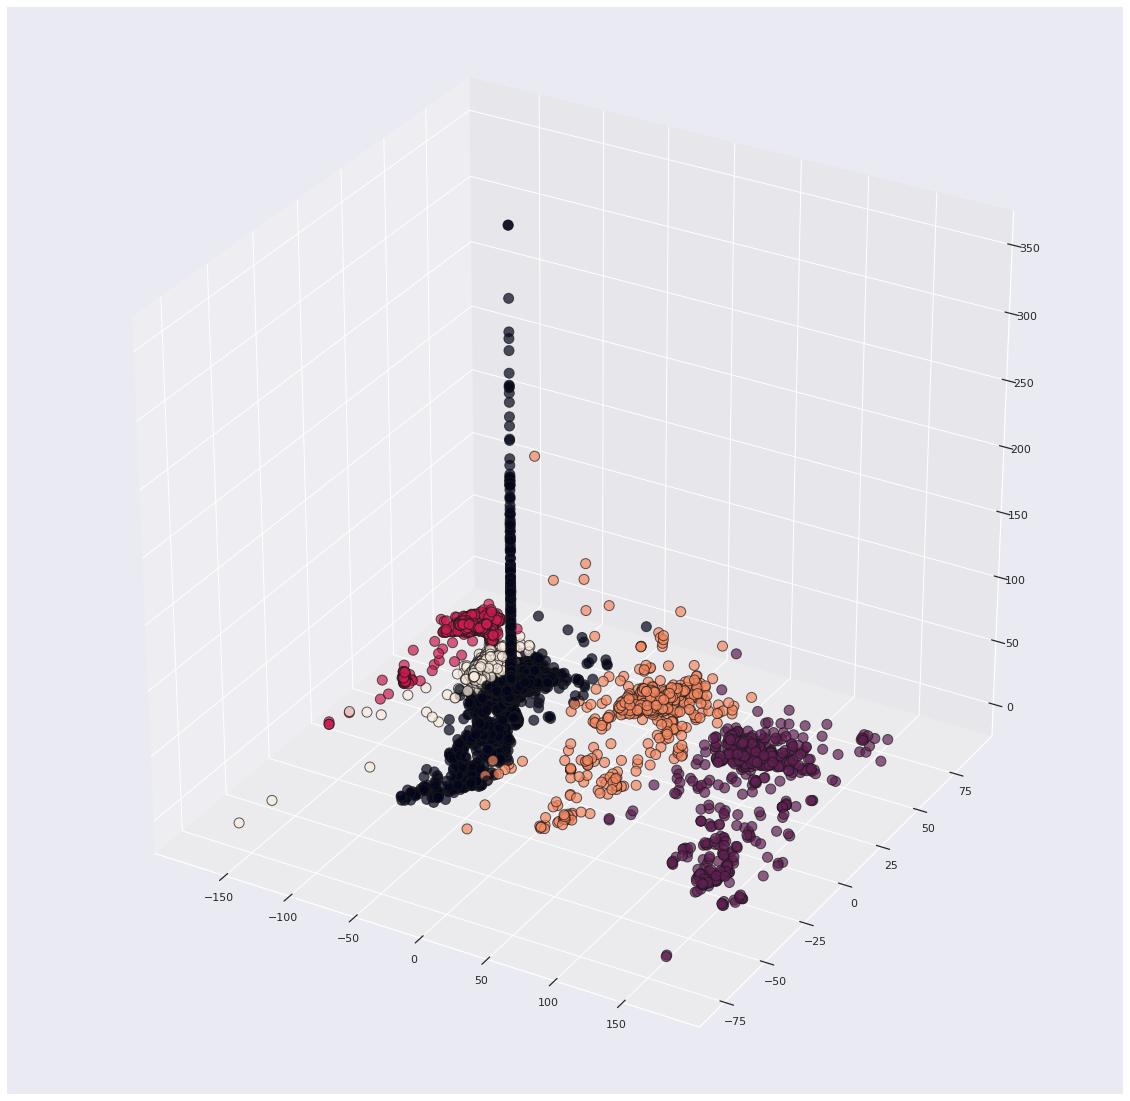

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans

X = pd.DataFrame(Avdata[["Latitude", "Longitude", "Total.Fatal.Injuries"]]) 
X["Total.Fatal.Injuries"] = X["Total.Fatal.Injuries"].fillna(0);
X.fillna(X.mean(), inplace=True)

# Set "optimal" Number of Clusters
num_clust = 5

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)        

# Fit the Clustering Model on the Data
kmeans.fit(X)


# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_labeled["Longitude"], X_labeled["Latitude"], X_labeled["Total.Fatal.Injuries"],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 100,
           c= X_labeled["Cluster"])
plt.show()

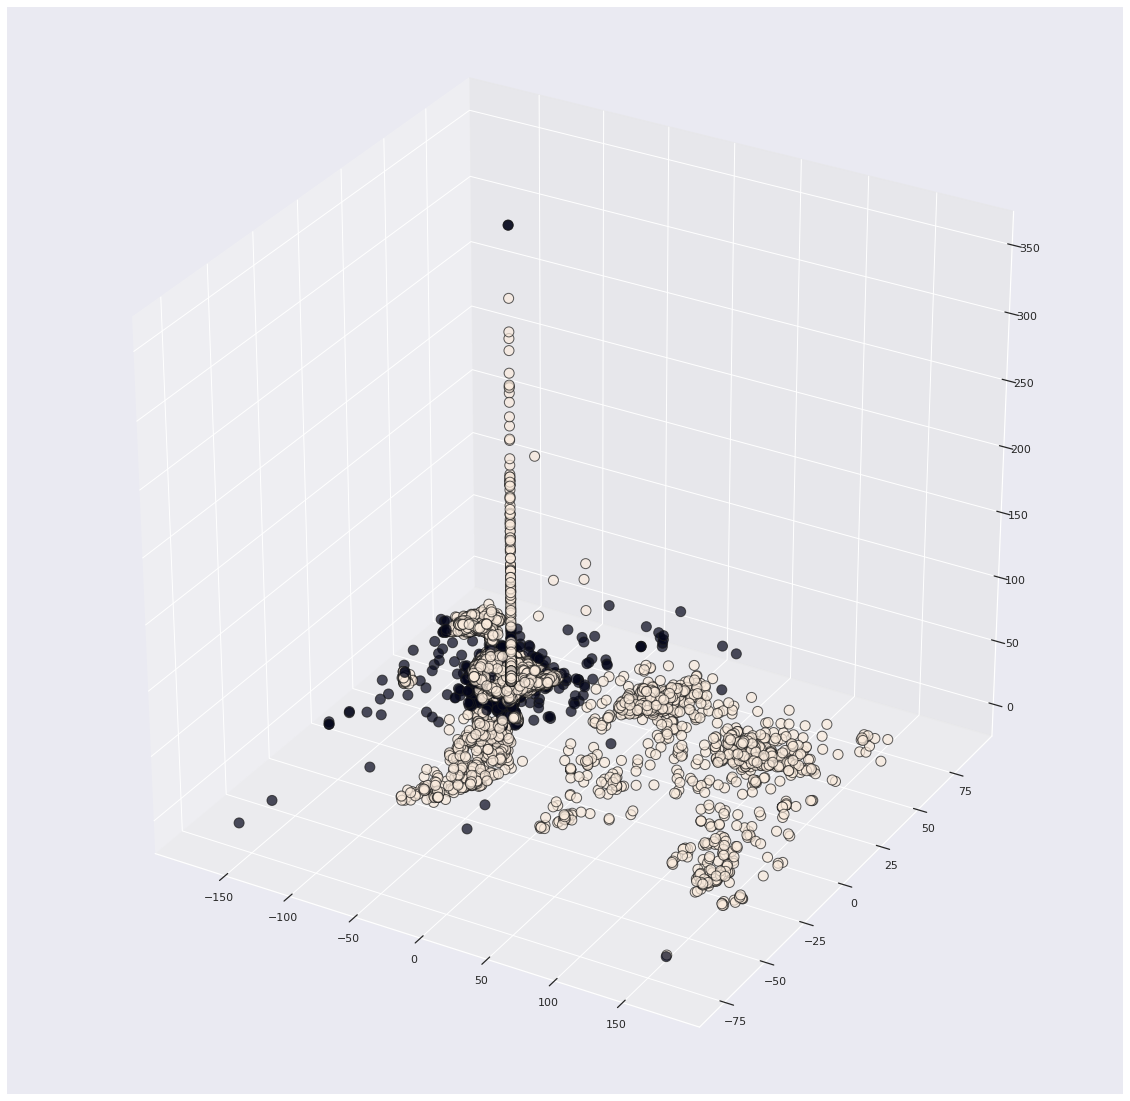

In [79]:
from sklearn.neighbors import LocalOutlierFactor

# Guessing the Parameters for Neighborhood
num_neighbors = 85    # Number of Neighbors
cont_fraction = 0.01 # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_labeled["Longitude"], X_labeled["Latitude"], X_labeled["Total.Fatal.Injuries"],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 100,
           c= X_labeled["Anomaly"])
plt.show()